# Session - 28(Machine Learning - 8)

In [ ]:
'''
In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to
extract text from webpage.

Hint:
from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
'''

## Load Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Import python modules for text classification

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('webtext')
from nltk.corpus import stopwords, webtext
from bs4 import BeautifulSoup
import urllib.request

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avengers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avengers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Avengers\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.


### Load DataSet

In [3]:
# Requesting to http://php.net/
response = urllib.request.urlopen('http://php.net/')
# Reading response from http://php.net/
html = response.read()
# Parses pages the same way a web browser does and Creates valid HTML5
soup = BeautifulSoup(html,"html5lib")

### Data Analysis

In [4]:
#Type of respoense variable

print(type(response))

<class 'http.client.HTTPResponse'>


In [5]:
#Type of html variable

print(type(html))

<class 'bytes'>


In [6]:
#Type of soup variable

print(type(soup))

<class 'bs4.BeautifulSoup'>


In [7]:
# Data from  http://php.net/
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="styles

In [8]:
# Print soup data # Note : BeautifulSoup object , represents the document as a nested data structure

print(soup)

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="http://php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="http://php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="http://php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="http://php.net/index.php" rel="canonical"/>
 <link href="http://php.net/index" rel="shorturl"/>
 <link href="http://php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="/cached.php?t=15397

In [9]:
# Name elements of soup
soup.name

'[document]'

In [10]:
#Shows the data in head html tag
soup.head

<head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="http://php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="http://php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="http://php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="http://php.net/index.php" rel="canonical"/>
 <link href="http://php.net/index" rel="shorturl"/>
 <link href="http://php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="/cached.php?t=1539765004&amp;f=/fonts/Font-Awesome/css/fontello.css" media="screen" rel=

In [11]:
# Title of data
soup.title

<title>PHP: Hypertext Preprocessor</title>

In [12]:
# Shows the first <b> tag beneath the <body> tag
soup.body.b

<b>THIS IS A DEVELOPMENT PREVIEW - DO NOT USE IT IN PRODUCTION!</b>

In [13]:
# Show attirbutes in soup variable 
soup.body.attrs

{'class': ['home', '']}

In [14]:
# Show first div in soup variable 
soup.body.div

<div class="navbar-inner clearfix">
    <a class="brand" href="/"><img alt="php" height="24" src="/images/logos/php-logo.svg" width="48"/></a>
    <div id="mainmenu-toggle-overlay"></div>
    <input id="mainmenu-toggle" type="checkbox"/>
    <ul class="nav">
      <li class=""><a href="/downloads">Downloads</a></li>
      <li class=""><a href="/docs.php">Documentation</a></li>
      <li class=""><a href="/get-involved">Get Involved</a></li>
      <li class=""><a href="/support">Help</a></li>
    </ul>
    <form action="/search.php" class="navbar-search" id="topsearch">
      <input name="show" type="hidden" value="quickref"/>
      <input accesskey="s" class="search-query" name="pattern" placeholder="Search" type="search"/>
    </form>
  </div>

### Counting Words

### Tokenization

In [17]:
# Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization.
from nltk.tokenize import sent_tokenize , word_tokenize
tokenized_text=sent_tokenize(soup.text)
print("Tokenized sentence\n" , tokenized_text)

Tokenized sentence
 ["\n\n  \n  \n\n  PHP: Hypertext Preprocessor\n\n \n \n \n \n\n \n \n \n\n\n\n\n\n\n\n\n\n \n\n \n\n \n\n \n\n \n\n\n\n\n\n  \n    \n    \n    \n    \n      Downloads\n      Documentation\n      Get Involved\n      Help\n    \n    \n      \n      \n    \n  \n  \n\n\nGetting Started\n\tIntroduction\n\tA simple tutorial\nLanguage Reference\n\tBasic syntax\n\tTypes\n\tVariables\n\tConstants\n\tExpressions\n\tOperators\n\tControl Structures\n\tFunctions\n\tClasses and Objects\n\tNamespaces\n\tErrors\n\tExceptions\n\tGenerators\n\tReferences Explained\n\tPredefined Variables\n\tPredefined Exceptions\n\tPredefined Interfaces and Classes\n\tContext options and parameters\n\tSupported Protocols and Wrappers\n\n\nSecurity\n\tIntroduction\n\tGeneral considerations\n\tInstalled as CGI binary\n\tInstalled as an Apache module\n\tSession Security\n\tFilesystem Security\n\tDatabase Security\n\tError Reporting\n\tUsing Register Globals\n\tUser Submitted Data\n\tMagic Quotes\n\tHidi

In [18]:
# Word tokenization

tokenized_word=word_tokenize(soup.text)
print("Tokenized Words\n",tokenized_word)

Tokenized Words
 ['PHP', ':', 'Hypertext', 'Preprocessor', 'Downloads', 'Documentation', 'Get', 'Involved', 'Help', 'Getting', 'Started', 'Introduction', 'A', 'simple', 'tutorial', 'Language', 'Reference', 'Basic', 'syntax', 'Types', 'Variables', 'Constants', 'Expressions', 'Operators', 'Control', 'Structures', 'Functions', 'Classes', 'and', 'Objects', 'Namespaces', 'Errors', 'Exceptions', 'Generators', 'References', 'Explained', 'Predefined', 'Variables', 'Predefined', 'Exceptions', 'Predefined', 'Interfaces', 'and', 'Classes', 'Context', 'options', 'and', 'parameters', 'Supported', 'Protocols', 'and', 'Wrappers', 'Security', 'Introduction', 'General', 'considerations', 'Installed', 'as', 'CGI', 'binary', 'Installed', 'as', 'an', 'Apache', 'module', 'Session', 'Security', 'Filesystem', 'Security', 'Database', 'Security', 'Error', 'Reporting', 'Using', 'Register', 'Globals', 'User', 'Submitted', 'Data', 'Magic', 'Quotes', 'Hiding', 'PHP', 'Keeping', 'Current', 'Features', 'HTTP', 'auth

## Frequency Distribution

In [19]:
from nltk.probability import FreqDist
word_freq = FreqDist(tokenized_word)
print("Word Frequency:\n",word_freq)

Word Frequency:
 <FreqDist with 538 samples and 4247 outcomes>


In [20]:
# Word elements in frequency element
word_freq.elements

<bound method Counter.elements of FreqDist({'the': 255, '.': 228, 'PHP': 202, 'of': 101, ',': 91, 'in': 84, 'release': 84, 'and': 80, 'be': 79, 'can': 78, ...})>

In [21]:
# Common word in frequency elements
# top 10 common words
word_freq.most_common(10)

[('the', 255),
 ('.', 228),
 ('PHP', 202),
 ('of', 101),
 (',', 91),
 ('in', 84),
 ('release', 84),
 ('and', 80),
 ('be', 79),
 ('can', 78)]

In [22]:
# Items in word freq
word_freq.items()

dict_items([('PHP', 202), (':', 1), ('Hypertext', 1), ('Preprocessor', 1), ('Downloads', 1), ('Documentation', 1), ('Get', 1), ('Involved', 1), ('Help', 1), ('Getting', 1), ('Started', 1), ('Introduction', 2), ('A', 18), ('simple', 1), ('tutorial', 1), ('Language', 2), ('Reference', 2), ('Basic', 2), ('syntax', 1), ('Types', 1), ('Variables', 2), ('Constants', 1), ('Expressions', 1), ('Operators', 1), ('Control', 2), ('Structures', 1), ('Functions', 1), ('Classes', 2), ('and', 80), ('Objects', 1), ('Namespaces', 1), ('Errors', 1), ('Exceptions', 2), ('Generators', 1), ('References', 1), ('Explained', 1), ('Predefined', 3), ('Interfaces', 1), ('Context', 1), ('options', 1), ('parameters', 1), ('Supported', 1), ('Protocols', 1), ('Wrappers', 1), ('Security', 4), ('General', 1), ('considerations', 1), ('Installed', 2), ('as', 3), ('CGI', 1), ('binary', 1), ('an', 2), ('Apache', 1), ('module', 1), ('Session', 2), ('Filesystem', 1), ('Database', 3), ('Error', 1), ('Reporting', 1), ('Using',

In [23]:
# Printing all the words and occurance of the word.

for key,value in word_freq.items():
    print(key + ' --> ' + str(value))

PHP --> 202
: --> 1
Hypertext --> 1
Preprocessor --> 1
Downloads --> 1
Documentation --> 1
Get --> 1
Involved --> 1
Help --> 1
Getting --> 1
Started --> 1
Introduction --> 2
A --> 18
simple --> 1
tutorial --> 1
Language --> 2
Reference --> 2
Basic --> 2
syntax --> 1
Types --> 1
Variables --> 2
Constants --> 1
Expressions --> 1
Operators --> 1
Control --> 2
Structures --> 1
Functions --> 1
Classes --> 2
and --> 80
Objects --> 1
Namespaces --> 1
Errors --> 1
Exceptions --> 2
Generators --> 1
References --> 1
Explained --> 1
Predefined --> 3
Interfaces --> 1
Context --> 1
options --> 1
parameters --> 1
Supported --> 1
Protocols --> 1
Wrappers --> 1
Security --> 4
General --> 1
considerations --> 1
Installed --> 2
as --> 3
CGI --> 1
binary --> 1
an --> 2
Apache --> 1
module --> 1
Session --> 2
Filesystem --> 1
Database --> 3
Error --> 1
Reporting --> 1
Using --> 2
Register --> 1
Globals --> 1
User --> 2
Submitted --> 1
Data --> 1
Magic --> 1
Quotes --> 1
Hiding --> 1
Keeping --> 1
Current 

In [26]:
# Stop words in english

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'was', 'your', 'yourself', 'such', 'why', 'themselves', 'himself', 'as', 'for', 'it', 'few', "mustn't", 'any', 'hasn', 'hadn', "don't", 'aren', 'after', 'who', "won't", 'only', 'doing', 'a', 'which', 'did', 'against', 'by', 'then', 'over', 'above', "couldn't", 'further', 'will', 'haven', 'the', 'what', 'while', 'these', 'myself', 'are', 'at', "shan't", 'both', 'me', 'wouldn', 'needn', 'm', 'until', 're', "wouldn't", 'mustn', 's', 'between', 'hers', 'or', 'where', 'isn', 'just', 'to', 'not', 'his', 'i', 'that', 'most', 'doesn', 'out', "she's", 'am', "shouldn't", 'is', "should've", 'some', 'my', 'down', 'when', 'on', 'but', 'o', 'up', 'shouldn', 'were', "hasn't", 'its', 'had', "that'll", 'can', 'herself', 'too', 'have', 'ma', 'do', 'they', 'ain', "you'll", 'theirs', 'from', 'don', 'this', 'how', 'below', 'here', 'if', "you'd", 'her', "it's", 'during', "wasn't", 'won', 'our', 'we', 'ours', 'each', 'other', 'couldn', 'of', 'nor', 'being', "hadn't", 'and', "you're", 'd', 'mightn', 'didn', 

In [27]:
# Word count after stopwords

filtered_words=[]
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)
        
#Count the number of times that each a word occurs and stores in a dictionary where word is the key and count is value.
counts_new = nltk.FreqDist(filtered_words)

#Printing all the words and occurance of the word.
print(counts_new.items())

dict_items([('PHP', 202), (':', 1), ('Hypertext', 1), ('Preprocessor', 1), ('Downloads', 1), ('Documentation', 1), ('Get', 1), ('Involved', 1), ('Help', 1), ('Getting', 1), ('Started', 1), ('Introduction', 2), ('A', 18), ('simple', 1), ('tutorial', 1), ('Language', 2), ('Reference', 2), ('Basic', 2), ('syntax', 1), ('Types', 1), ('Variables', 2), ('Constants', 1), ('Expressions', 1), ('Operators', 1), ('Control', 2), ('Structures', 1), ('Functions', 1), ('Classes', 2), ('Objects', 1), ('Namespaces', 1), ('Errors', 1), ('Exceptions', 2), ('Generators', 1), ('References', 1), ('Explained', 1), ('Predefined', 3), ('Interfaces', 1), ('Context', 1), ('options', 1), ('parameters', 1), ('Supported', 1), ('Protocols', 1), ('Wrappers', 1), ('Security', 4), ('General', 1), ('considerations', 1), ('Installed', 2), ('CGI', 1), ('binary', 1), ('Apache', 1), ('module', 1), ('Session', 2), ('Filesystem', 1), ('Database', 3), ('Error', 1), ('Reporting', 1), ('Using', 2), ('Register', 1), ('Globals', 1

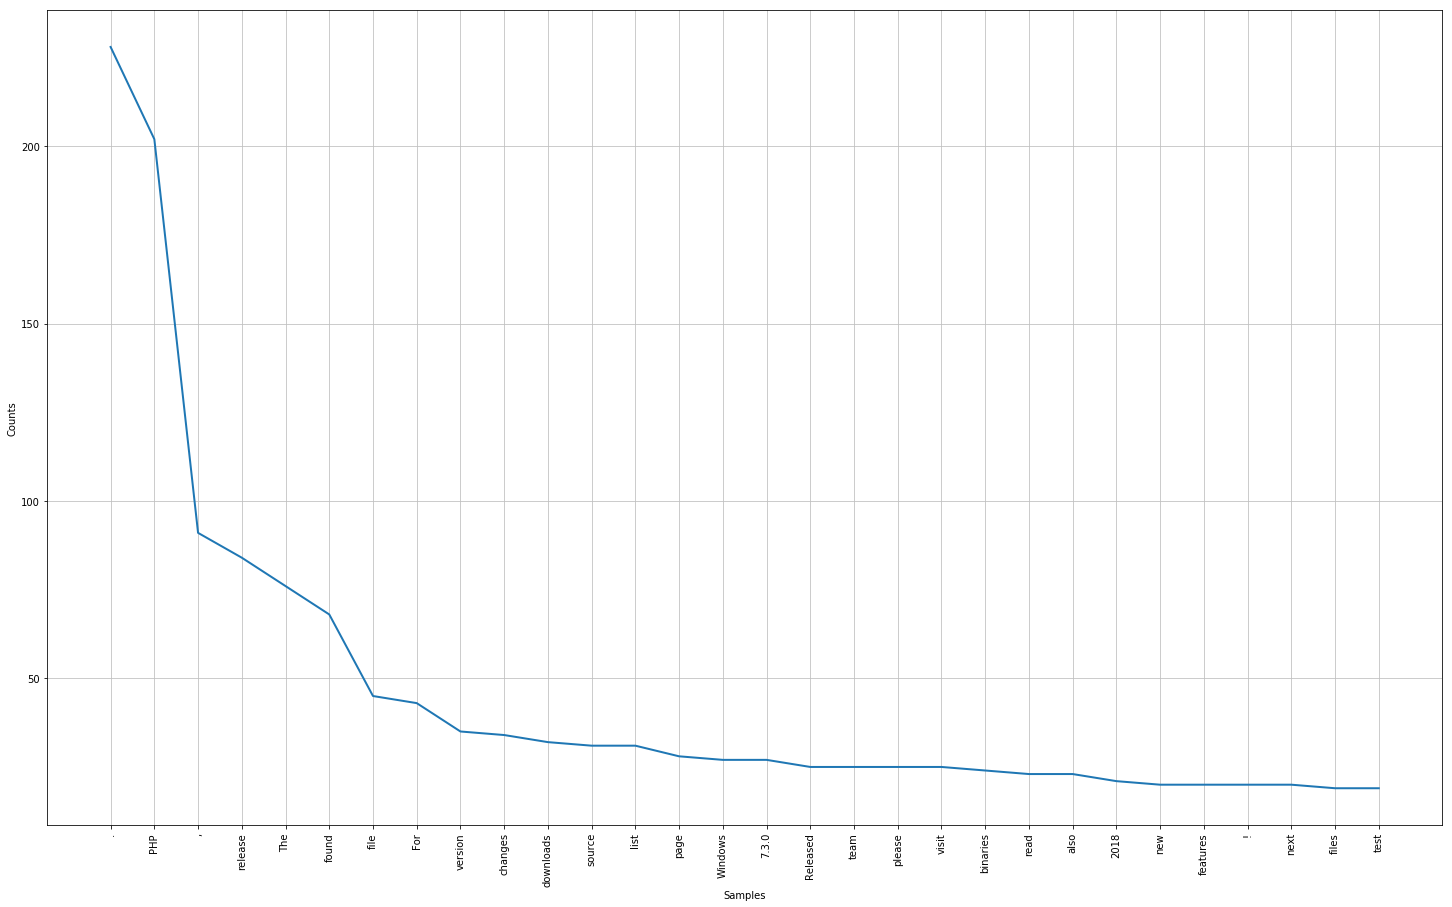

In [28]:
# Frequency Distribution Plot

import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
counts_new.plot(30,cumulative=False)
plt.show()

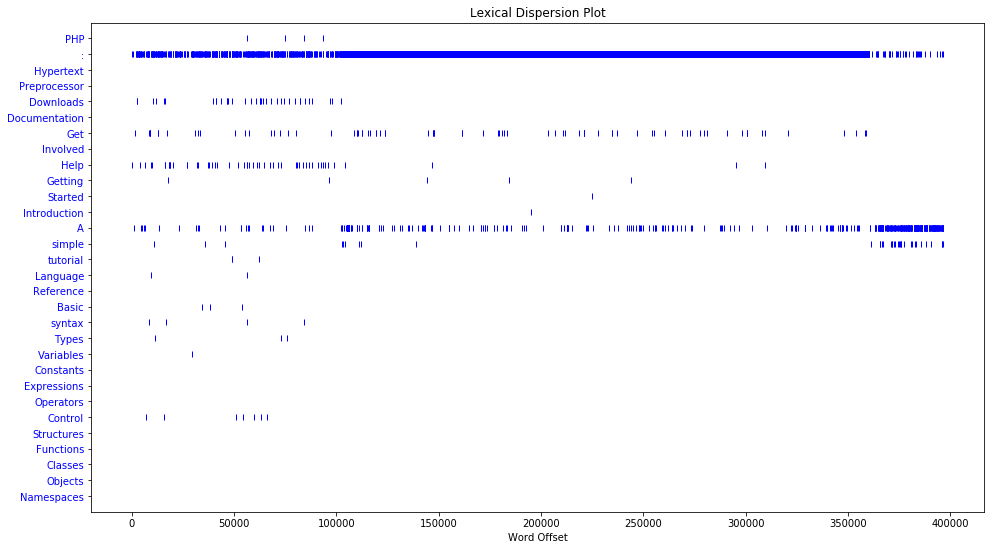

In [31]:
# Dispersion Plot of first 30 words with respect to webtext words
plt.figure(figsize=(16,9))
webtext = nltk.text.Text(nltk.corpus.webtext.words())
webtext.dispersion_plot(filtered_words[:30])